In [111]:
!pip install shap

In [112]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [113]:
import io

In [114]:
from google.colab import files
uploaded = files.upload()

Saving CAT.csv to CAT.csv


In [115]:
df= pd.read_csv(io.BytesIO(uploaded['CAT.csv']))
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0      1/4/2010   57.650002   59.189999   57.509998   58.549999   40.336735   
1      1/5/2010   58.549999   59.439999   58.230000   59.250000   40.818954   
2      1/6/2010   59.180000   59.930000   59.049999   59.430000   40.942982   
3      1/7/2010   59.299999   59.900002   58.650002   59.669998   41.108299   
4      1/8/2010   59.250000   60.369999   59.250000   60.340000   41.569908   
...         ...         ...         ...         ...         ...         ...   
2635  6/23/2020  127.389999  127.570000  125.830002  126.250000  116.270164   
2636  6/24/2020  124.790001  124.839996  121.830002  122.059998  112.411362   
2637  6/25/2020  121.610001  124.830002  120.800003  124.709999  114.851898   
2638  6/26/2020  124.330002  124.440002  121.449997  122.389999  112.715286   
2639  6/29/2020  123.720001  126.040001  123.279999  125.250000  115.349205   

         Average  
0      54.647347  
1      55.257

In [116]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close,Average
0,57.650002,59.189999,57.509998,58.549999,40.336735,54.647347
1,58.549999,59.439999,58.230000,59.250000,40.818954,55.257790
2,59.180000,59.930000,59.049999,59.430000,40.942982,55.706596
3,59.299999,59.900002,58.650002,59.669998,41.108299,55.725660
4,59.250000,60.369999,59.250000,60.340000,41.569908,56.155981


In [117]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x = df.drop("Average", axis = 1)
y = df.Close
y = y.astype('int')

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          51       0.00      0.00      0.00         0
          52       0.00      0.00      0.00         1
          55       0.00      0.00      0.00         1
          56       0.67      1.00      0.80         2
          58       1.00      1.00      1.00         2
          59       1.00      1.00      1.00         2
          60       0.67      1.00      0.80         2
          61       0.00      0.00      0.00         1
          62       0.80      1.00      0.89         4
          63       1.00      0.75      0.86         4
          64       0.75      1.00      0.86         3
          65       1.00      0.75      0.86         4
          66       1.00      1.00      1.00         2
          67       1.00      1.00      1.00         1
          68       1.00      1.00      1.00         2
          69       1.00      1.00      1.00         2
          70       1.00      1.00      1.00         3
          71       1.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [121]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=0)

In [122]:
y_pred = classifier.predict(x_test)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.050505050505050504

In [124]:
clearer = shap.Explainer(clf)
shap_values = clearer.shap_values(x_test)

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


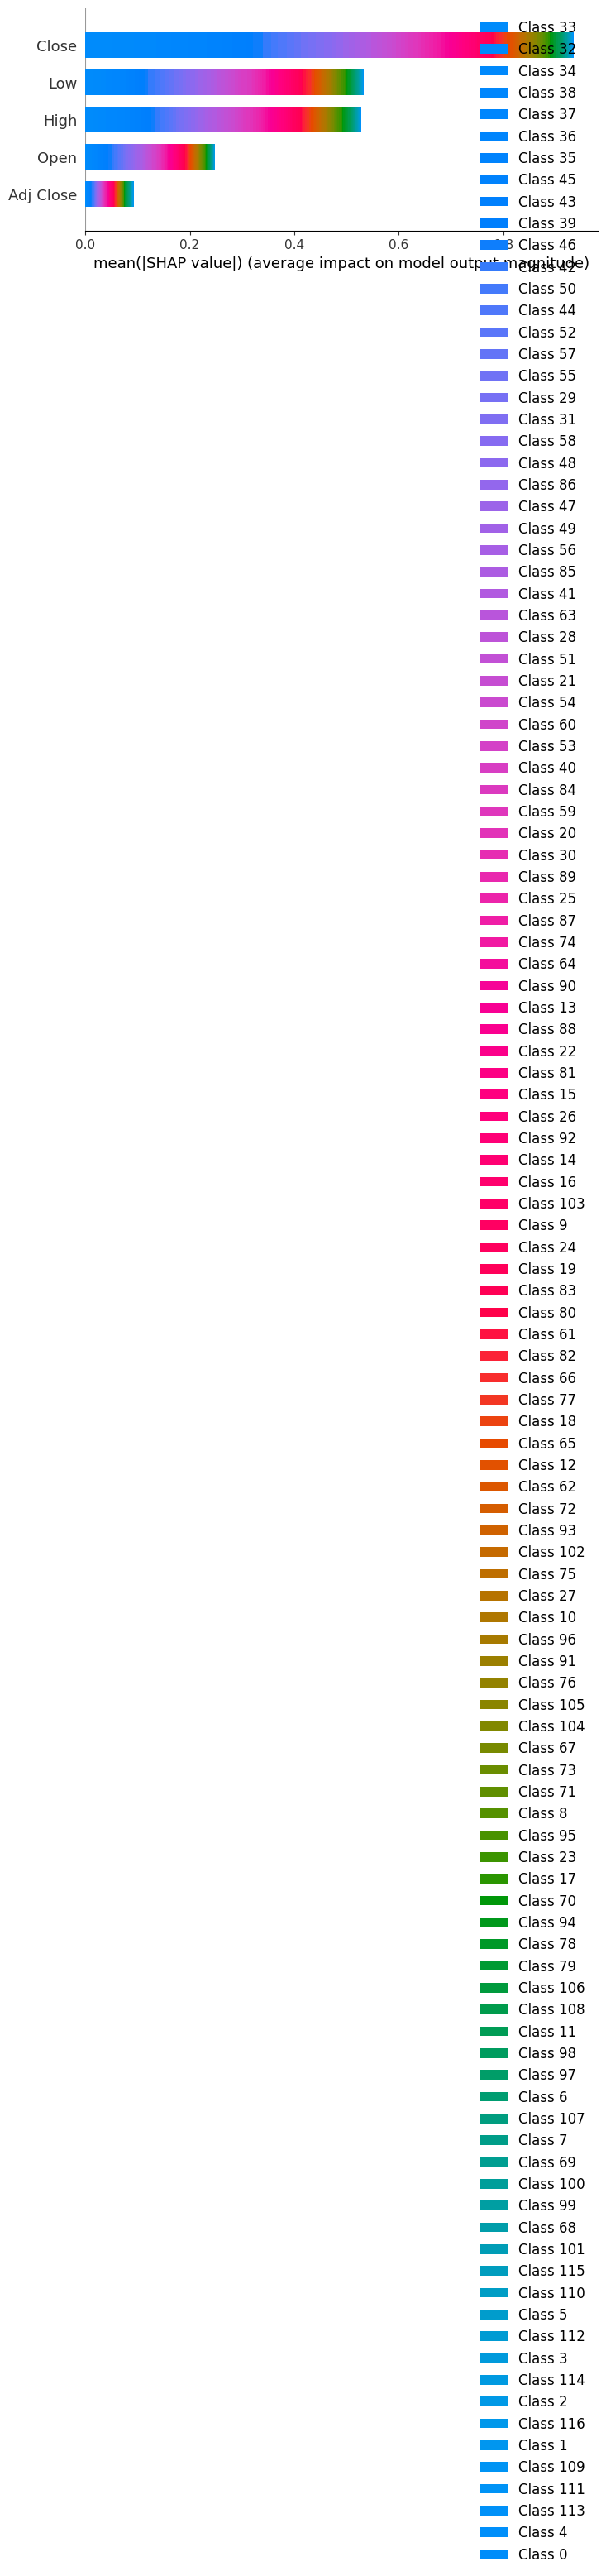

In [125]:
shap.summary_plot(shap_values, x_test)